<b><font size=20, color='#A020F0'>AOS573 Final Project</font></b>

### Investigating the Correlation between Global CO2 Concentration and Wildfire Severity in the United States 

By Erica Bortfeldt

#### Motivation

Climate change as a result of anthropogenic emissions is a well-documented phenomenon, comprised of a vast multitude of factors. On an anecdotal level, anyone who's been around for the last several decades' worth of fire seasons in the U.S. could say that the prevalence and intensity of wildfires have become noticeably more severe, especially in more recent years. This project, thus, seeks to establish a preliminarily definitive link between climate change as a result of anthropogenic CO2 emissions and subsequent magnified wildfire severity.

#### Data and Methodology

This project makes use of three datasets:
* [Total Wildland Fires and Acres (1983-2022)](https://www.nifc.gov/fire-information/statistics/wildfires), sourced from the National Interagency Fire Center
* [Globally Averaged Monthly Mean CO2 Data (1979-September, 2023)](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html), sourced from Scripps CO2 Program at UCSD
* [CMAP Global Monthly Mean Precipitation (1979-October, 2023)](https://psl.noaa.gov/data/gridded/data.cmap.html), sourced from NOAA Physical Sciences Laboratory

The first two datasets were re-formatted by hand and converted into .csv files so they could be read-in properly as Pandas dataframes. The third dataset required no re-formatting and can be read-in using Xarray. 

Once each dataset is read-in, the general analytic procedure is as follows:
* Evaluate basic statistics of each dataset to gain initial understanding of the data.
* Generate histograms of total number of fires and total acres burned. The purpose of this is to visualize the overall distribution of annual fire quantity and burn acreage between 1979 and 2022. 
* Create multi-panel time-series figure of total wildland fires per year, total acres burned per year, annual mean CO2 concentration, and annual mean precipitation bounded by U.S. lat/lons. This type of plot can supply a first glance at which parameters could share a correlation relationship.
* Generate linear regression plots of:
  * Total wildland fires per year and annual mean CO2 concentration
  * Total burn acreage per year and annual mean CO2 concentration
  * Total burn acreage per year and annual mean precipitation
  * Annual mean precipitation bounded by U.S. lat/lons and annual mean CO2 concentration. Establishing a negative correlation between precipitation and mean CO2 concentration simultaneously establishes reasonable causation for a positive correlation between fire severity and mean CO2 concentration, because a pattern of decreasing precipitation totals acts as a proxy for anthropogenically-forced drought conditions commonly associated with increased wildfire intensity.

#### Analysis

**First, let's read in all three datasets.**

In [1]:
#import packages
import pandas as pd
import scipy as sp
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
#Read in Fire Data

df_fire=pd.read_csv('Wildfires_1983_2022.csv')
df_fire

Year  Fires     Acres
0   1983  18229   1323666
1   1984  20493   1148409
2   1985  82591   2896147
3   1986  85907   2719162
4   1987  71300   2447296
5   1988  72750   5009290
6   1989  48949   1827310
7   1990  66481   4621621
8   1991  75754   2953578
9   1992  87394   2069929
10  1993  58810   1797574
11  1994  79107   4073579
12  1995  82234   1840546
13  1996  96363   6065998
14  1997  66196   2856959
15  1998  81043   1329704
16  1999  92487   5626093
17  2000  92250   7393493
18  2001  84079   3570911
19  2002  73457   7184712
20  2003  63629   3960842
21  2004  65461   8097880
22  2005  66753   8689389
23  2006  96385   9873745
24  2007  85705   9328045
25  2008  78979   5292468
26  2009  78792   5921786
27  2010  71971   3422724
28  2011  74126   8711367
29  2012  67774   9326238
30  2013  47579   4319546
31  2014  63312   3595613
32  2015  68151  10125149
33  2016  67743   5509995
34  2017  71499  10026086
35  2018  58083   8767492
36  2019  50477   4664364
37  2020  58950  10122336
38  2021  58985   7125643
39  2022  68988   7577183

In [3]:
#Read in CO2 data

df_co2=pd.read_csv('monthly_in_situ_co2_mlo.csv')
df_co2

Year  Month    Mean
0    1979.0    1.0  336.24
1    1979.0    2.0  336.77
2    1979.0    3.0  337.97
3    1979.0    4.0  338.89
4    1979.0    5.0  339.48
..      ...    ...     ...
532  2023.0    5.0  423.78
533  2023.0    6.0  423.39
534  2023.0    7.0  421.62
535  2023.0    8.0  419.56
536  2023.0    9.0  418.07

[537 rows x 3 columns]

In [4]:
#Read in precip data

ds=xr.open_dataset('precip.mon.mean.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 538)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-10-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2311
    history:        update 11/2023 V2311
    data_modified:  2023-11-07

**Now that we have our datasets read-in, we can begin to grasp some preliminary statistics to get a feel for the content of each dataset. For the two dataframes, this is very simple. For the Xarray dataset, it's a little more complex. Let's go ahead and quickly grab our statistics for the dataframes.**

In [5]:
#Fire stats for number of fires per year
df_fire['Fires'].describe()

count       40.000000
mean     69980.400000
std      16997.332376
min      18229.000000
25%      63549.750000
50%      71399.500000
75%      81340.750000
max      96385.000000
Name: Fires, dtype: float64

In [6]:
#Fire stats for burn acreage per year
df_fire['Acres'].describe()

count    4.000000e+01
mean     5.330347e+06
std      2.886577e+06
min      1.148409e+06
25%      2.886350e+06
50%      4.836827e+06
75%      7.707357e+06
max      1.012515e+07
Name: Acres, dtype: float64

In [7]:
#CO2 stats
df_co2['Mean'].describe()

count    537.000000
mean     374.143687
std       24.573885
min      333.870000
25%      353.480000
50%      371.150000
75%      393.770000
max      423.780000
Name: Mean, dtype: float64

**Here, we can see the total number of data points for each relevant variable with "count," the average of each relevant variable with "mean," the standard deviation, which quantifies the level of variation/dispersion of each relevant variable, with "std," the minimum value in the variable set with "min," the maximum value in the variable set with "max," the lower quartile with "25%," the median value with "50%," and the upper quartile with "75%."** 

**These basic statistics do little in the way of telling us what the *trend* of the data is, but we can still garner some useful information from them. For instance, we now know that:**
* **75% of all data points for total annual number of wildfires in the US between 1983 and 2022 fall below ~81,340 fires.**
* **Similarly, 75% of all data points for total annual burn acreage from US wildfires between 1983 and 2022 fall below ~7,707,357 acres.**
* **The range of CO2 concentration between 1979 and mid-2023 is ~334-424 ppm. In knowing there's been a general upward trend of CO2 concentration since 1979, we ascertain that the anthropogenic emissions increase in this time frame has been significant.**

**So, now that we know a little bit about our fires and CO2 data, what about precipitation? Let's compute some statistics for it.**

In [8]:
#Select precip values bounded only within the contiguous US territory
US_precip=ds.precip.sel(lat=np.arange(23.75,51.25,2.5),lon=np.arange(233.75,293.75,2.5))

#Take mean across US lat/lon bounds to get average US precip at each time
US_precip=US_precip.mean(dim= ['lat','lon'])

US_precip

<xarray.DataArray 'precip' (time: 538)>
array([2.6445832, 2.1699998, 1.9436742, 2.3423486, 2.294356 , 2.2174623,
       2.8012881, 2.5017803, 2.8326516, 1.9998863, 1.881212 , 1.6551137,
       2.071439 , 1.8928031, 2.2858713, 1.924394 , 2.0732577, 2.0025377,
       2.2212121, 2.4867804, 2.600492 , 2.0256062, 1.8855305, 1.5787122,
       1.3070832, 1.9473486, 1.6965908, 1.6348864, 2.327538 , 2.6163256,
       2.4852653, 2.837538 , 2.0994318, 2.3410985, 1.7471212, 1.8814393,
       2.0445454, 1.8373485, 1.8964396, 2.1008334, 2.3059092, 2.5111363,
       2.4072726, 2.1123486, 2.6574621, 2.0039394, 2.4763255, 2.6090152,
       2.067841 , 2.6799624, 2.7573485, 2.29822  , 2.3344693, 2.4205303,
       2.1976514, 2.478788 , 2.6701138, 2.269015 , 2.931023 , 2.6518562,
       1.5273865, 1.9151137, 1.8745456, 2.066932 , 2.311023 , 2.4409091,
       2.6251137, 2.285606 , 2.3643563, 2.4050002, 2.3216288, 1.7762122,
       1.4167804, 1.7647729, 1.7198863, 1.6389015, 2.017841 , 2.3185227,
       2.5140908, 2.614432 , 2.6773107, 2.722765 , 2.4250376, 1.4423486,
       1.4978788, 1.7656816, 1.5568181, 1.4742801, 1.8438256, 2.3849242,
       2.1035984, 2.1714773, 2.3702273, 2.014129 , 2.1490529, 1.8023106,
       1.7860605, 1.8146969, 2.1438255, 1.226856 , 1.8667804, 2.1856437,
       2.1210985, 2.0723863, 2.1567802, 1.9703788, 2.053182 , 1.8503788,
       1.887462 , 1.5023105, 1.5313635, 1.6979543, 1.8692423, 1.9144319,
       2.2099621, 2.6168182, 2.4539015, 1.5263258, 2.2337122, 1.3880304,
...
       1.2998865, 1.6529547, 1.6745076, 1.9334469, 1.764659 , 2.337197 ,
       2.1489394, 2.5039773, 2.5378032, 2.0350757, 1.8198106, 1.6428787,
       1.4256061, 1.5181438, 1.4511743, 1.9065529, 2.2887123, 2.4167802,
       2.204432 , 2.0560226, 2.3240533, 2.3244321, 1.9623106, 2.2726893,
       1.9399999, 1.5554924, 2.0965154, 1.7995832, 2.1289773, 2.097576 ,
       2.0353787, 2.5395834, 2.4242423, 2.1200378, 1.4743559, 1.8269697,
       2.0400376, 1.6920455, 1.6310226, 2.087803 , 2.2167425, 2.3231058,
       1.9665532, 2.6336365, 2.4214013, 2.2371593, 1.5686364, 1.2053787,
       1.8996212, 1.6039394, 1.5149622, 1.7851516, 2.1515908, 2.085947 ,
       2.1755302, 2.0050378, 2.6115909, 2.2951517, 2.109697 , 2.17197  ,
       1.8050759, 2.1404166, 1.4767046, 2.1004167, 2.322462 , 2.2751515,
       2.020265 , 2.2792044, 2.29375  , 2.3532956, 1.4631441, 1.7693563,
       1.7385607, 1.5679168, 1.74     , 1.7508714, 2.1760604, 2.2102652,
       2.3509467, 2.031591 , 2.1848106, 1.925644 , 1.5252651, 1.5099242,
       1.3297348, 1.5404925, 1.4618938, 1.416856 , 1.7579546, 2.3626137,
       2.3818183, 2.2458713, 2.176326 , 2.3654168, 1.343106 , 1.7195076,
       1.414697 , 1.3124242, 1.4747348, 1.7043561, 2.0819318, 2.0121589,
       1.9092045, 2.3663256, 2.1719697, 1.6562879, 1.8306818, 1.8448864,
       1.6865151, 1.3320832, 1.6439393, 1.8924999, 1.8217045, 2.1701515,
       1.9809471, 2.0069695, 1.9572729, 1.825909 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-10-01

In [9]:
#Calculate mean, max, min, std, lower quartile, upper quartile, median
print('US_precip basic stats:')
print('US_precip mean = ', np.mean(US_precip.values), 'mm/day')
print('US_precip max = ', np.max(US_precip.values), 'mm/day')
print('US_precip min = ', np.min(US_precip.values), 'mm/day')
print('US_precip standard deviation = ', np.std(US_precip.values), 'mm/day')
print('US_precip lower quartile = ', np.percentile(US_precip.values,25), 'mm/day')
print('US_precip upper quartile = ', np.percentile(US_precip.values,75), 'mm/day')
print('US_precip median = ', np.percentile(US_precip.values,50), 'mm/day')

US_precip basic stats:
US_precip mean =  1.9956278 mm/day
US_precip max =  2.931023 mm/day
US_precip min =  1.0495834 mm/day
US_precip standard deviation =  0.36367875 mm/day
US_precip lower quartile =  1.7408334016799927 mm/day
US_precip upper quartile =  2.248910963535309 mm/day
US_precip median =  2.0105870962142944 mm/day


**From these stats, we now have the following preliminary understanding of our precipitation data:**
* **The overall average precipitation in the continental US between 1979 and mid-2023 is ~2 millimeters per day.**
* **In some month between 1979 and mid-2023, the precipitation in the US averaged ~3 millimeters/day, which is the absolute maximum in the entire US_precip data array.**
* **25% of all monthly mean US precipitation data points fall below ~1.74 mm/day.**
* **75% of all monthly mean US precipitation data points fall below ~2.25 mm/day.**

**Now that we have our basic stats, let's start to visualize our data. First, let's look at our wildfire and burn acreage distribution with a couple bar plots and histograms.**

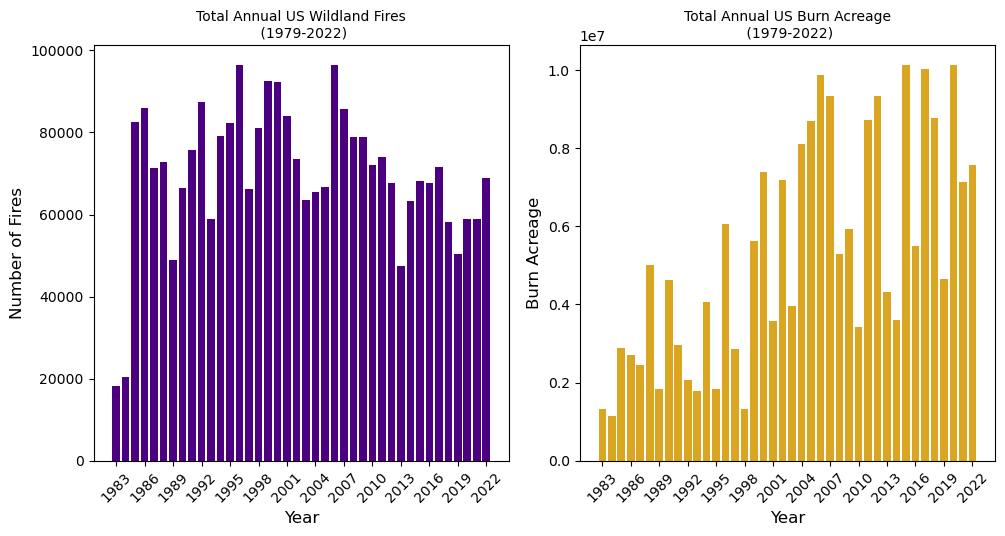

In [10]:
#make quick bar plots of total annual fires and total annual burn acreage, categorized by year
#set up figure
fig,ax = plt.subplots(1,2, figsize=(10,5))

#format figure
axs = ax.flatten()
plt.tight_layout(pad=2)

#plot data
p1=axs[0].bar(df_fire.Year,df_fire.Fires,color='indigo')
p2=axs[1].bar(df_fire.Year,df_fire.Acres,color='goldenrod')

#Set plot titles
axs[0].set_title('Total Annual US Wildland Fires\n (1979-2022)', fontsize = 10)
axs[1].set_title('Total Annual US Burn Acreage\n (1979-2022)', fontsize = 10)

#Set plot axis labels
axs[0].set_xticks(df_fire.Year[::3])
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_xlabel('Year', fontsize = 12)
axs[0].set_ylabel('Number of Fires', fontsize = 12)

axs[1].set_xticks(df_fire.Year[::3])
axs[1].tick_params(axis='x',labelrotation=45)
axs[1].set_xlabel('Year',fontsize=12)
axs[1].set_ylabel('Burn Acreage',fontsize=12);

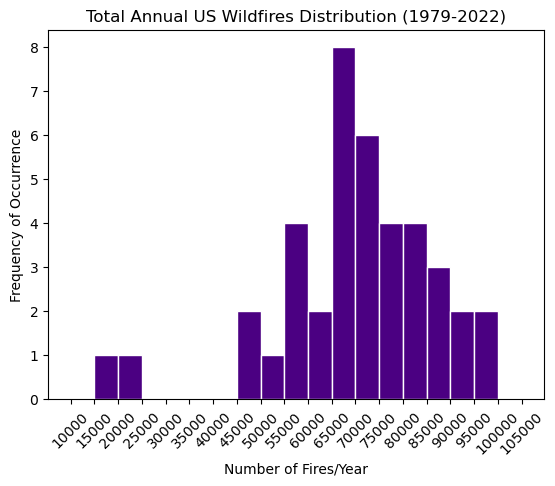

In [11]:
#now make histogram of total fires, binned by quantity of fires
#bins
bins=np.arange(10000,110000,5000)

#plot histogram
plt.subplot()
df_fire.Fires.hist(bins=bins,color='indigo',ec='white',grid=False)

#Set labels and title + x axis formatting
plt.title('Total Annual US Wildfires Distribution (1979-2022)')
plt.xlabel('Number of Fires/Year')
plt.ylabel('Frequency of Occurrence')
plt.xticks(bins)
plt.tick_params(axis='x',labelrotation=45);

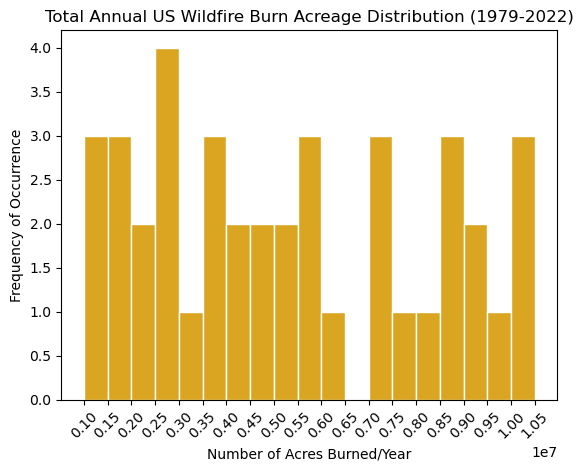

In [12]:
#make histogram of total burn acreage, binned by burn extent
bins2=np.arange(1000000,11000000,500000)

#plot histogram
plt.subplot()
df_fire.Acres.hist(bins=bins2,color='goldenrod',ec='white',grid=False)

#Set labels and title + x axis formatting
plt.title('Total Annual US Wildfire Burn Acreage Distribution (1979-2022)')
plt.xlabel('Number of Acres Burned/Year')
plt.ylabel('Frequency of Occurrence')
plt.xticks(bins2)
plt.tick_params(axis='x',labelrotation=45);

**What we've learned from these four plots:**
* **Total Annual Fires, plotted by year: there doesn't appear to be any immediate upward trend in wildfire instance frequency in the US as time progresses between 1979 and 2022.**
* **Total Annual Burn Acreage, plotted by year: there *does* appear to be a noticeable upward trend in the amount of acres burned by wildfires in the US as time progresses between 1979 and 2022.**
* **Total Annual Fires Distribution, binned by quantity of fires: the distribution of quantity of fires is relatively normal but presents with negative skewness; the majority of data points lie on the mid-to-large end of the quantity distribution.**
* **Total Annual Burn Acreage Distribution, binned by burn extent (amount of acres): the distribution of burn acreage, on the other hand, is not normal and has no statistically-significant skewness.**

**Due to the inherent non-normality of both distributions, the normality assumption innate to linear regression models might introduce some error in later analysis involving such a model to determine correlation relationships. However, this does not *necessarily* mean that the level of error introduced automatically discredits preliminary conclusions of correlation/causation. It simply means that the regression analysis should be repeated after normalizing the data to increase the accuracy of correlation findings. For the purposes of this project, non-normalized data will work just fine.**

**Now, let's create a multi-panel figure for timeseries of:**
* **Total Annual Wildfires**
* **Total Annual Burn Acreage**
* **Mean CO2 concentration**
* **Mean Monthly US Precip**

In [13]:
#First, take one more mean of US_precip to get an annual mean so we can better
#compare timeseries against wildfire data
US_precip_ann=US_precip.groupby('time.year').mean('time')
US_precip_ann

<xarray.DataArray 'precip' (year: 45)>
array([2.2736962, 2.0873864, 2.0768058, 2.2468812, 2.4797347, 2.1594858,
       2.1060574, 1.9278506, 1.937339 , 1.9026264, 1.9218812, 2.013908 ,
       2.1014016, 2.1484058, 2.1608868, 2.0630777, 2.0060575, 1.9861078,
       2.0630808, 2.1260545, 1.8899969, 1.8751041, 1.9354798, 1.9555017,
       2.0064933, 2.0170834, 2.025022 , 1.9734092, 1.8520266, 1.8831977,
       1.8970612, 1.8786615, 1.7505177, 1.7610006, 1.8826294, 1.9459282,
       2.0125759, 2.003226 , 2.0019603, 2.0341828, 2.024937 , 1.8926545,
       1.8417993, 1.8149716, 1.8317991], dtype=float32)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2019 2020 2021 2022 2023

In [14]:
#Then take annual mean of co2 data
co2_ann_mean=df_co2.groupby('Year').mean()
co2_ann_mean.Mean.head()

Year
1979.0    336.860833
1980.0    338.700000
1981.0    339.951667
1982.0    341.150833
1983.0    342.797500
Name: Mean, dtype: float64

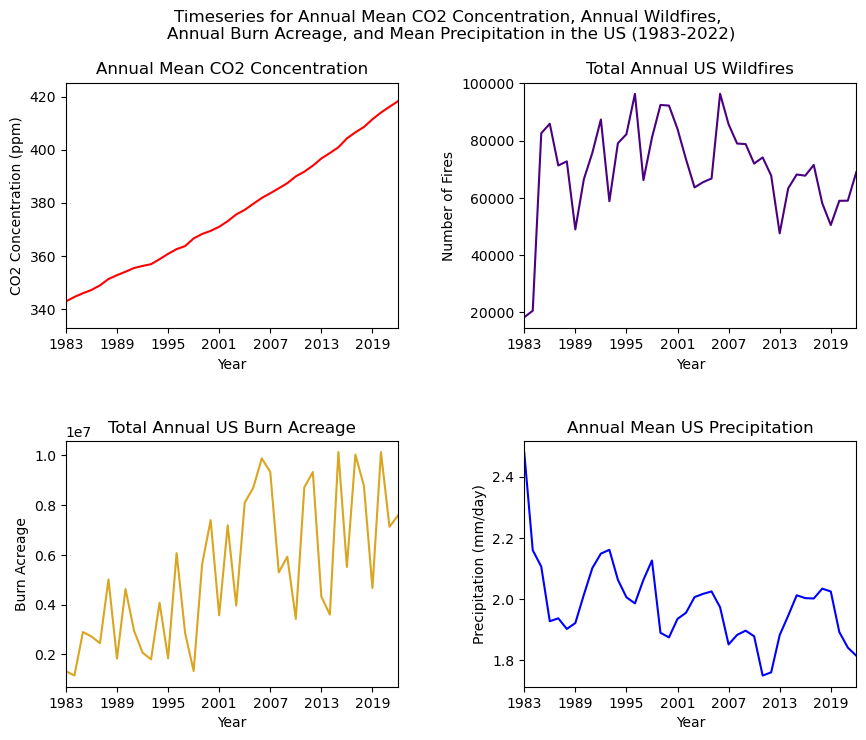

In [15]:
#set up figure
fig,ax = plt.subplots(2,2, figsize=(10,8))

#format figure
axs = ax.flatten()
plt.tight_layout(pad=6)

#plot data
co2=axs[0].plot(co2_ann_mean.Mean,color='red')
fire=axs[1].plot(df_fire['Year'],df_fire['Fires'],color='indigo')
acres=axs[2].plot(df_fire['Year'],df_fire['Acres'],color='goldenrod')
precip=axs[3].plot(US_precip_ann.year,US_precip_ann.values,color='blue')

#titles, axis labels, x limits
plt.suptitle('Timeseries for Annual Mean CO2 Concentration, Annual Wildfires, \nAnnual Burn Acreage, and Mean Precipitation in the US (1983-2022)')
axs[0].set_title('Annual Mean CO2 Concentration')
axs[1].set_title('Total Annual US Wildfires')
axs[2].set_title('Total Annual US Burn Acreage')
axs[3].set_title('Annual Mean US Precipitation')

axs[0].set_xlabel('Year')
axs[0].set_ylabel('CO2 Concentration (ppm)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Fires')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Burn Acreage')
axs[3].set_xlabel('Year')
axs[3].set_ylabel('Precipitation (mm/day)')

axs[0].set_xticks(np.arange(1983,2022,6))
axs[0].set_xlim(1983,2022)
axs[1].set_xticks(np.arange(1983,2022,6))
axs[1].set_xlim(1983,2022)
axs[2].set_xticks(np.arange(1983,2022,6))
axs[2].set_xlim(1983,2022)
axs[3].set_xticks(np.arange(1983,2022,6))
axs[3].set_xlim(1983,2022);

**What intuition about potential correlation relationships can we learn from these plots?**
* **There is little to no obvious correlation between annual mean CO2 concentration and total annual wildfires in the US between the years of 1979 and 2022.**
* **There is, however, a visible uptrend in annual burn acreage that seems to fit the upward trend of mean CO2 concentration between the years of 1979 and 2022.**
* **There is a visible *downtrend* in annual mean precipitation in the US between the years of 1979 and 2022. In knowing there is a direct relationship between decreased precipitation and increased drought conditions, we can preliminarily conclude it is not necessarily that worsening drought conditions *cause* fires, but rather, they make the extent to which a fire can grow much more significant.**
    * **It is, thus, apparent that a negative correlation exists between annual mean precipitation and total wildfire burn acreage, and, by association, a negative correlation between annual mean precipitation and annual mean CO2 concentration.**

**Let's take this just one more step further; as we cannot simply rely on our eyes to determine the extent to which an apparent relationship is correlated, we can make use of statistical correlation coefficients and linear regression models in order to gain a firmer understanding of a suspected correlation.**

**So let's look at linear regression models for:**
* **Total wildland fires per year and annual mean CO2 concentration**
* **Total burn acreage per year and annual mean CO2 concentration**
* **Annual mean precipitation bounded by U.S. lat/lons and annual mean CO2 concentration**
* **Total burn acreage per year and annual mean precipitation**

In [16]:
#first, narrow co2_ann_mean to 1983-2022 only (lin regress requires arrays to be equal length)
co2_ann_mean=co2_ann_mean.iloc[:-1,:]
co2_ann_mean=co2_ann_mean.iloc[4:,:]

In [17]:
#set up lin regress variables for total wildland fires and co2 concentration
x1=co2_ann_mean.Mean.values
y1=df_fire['Fires'].values

In [18]:
#import stats from scipy
from scipy import stats

#perform regression
regress1=stats.linregress(x1,y1)
regress1

LinregressResult(slope=-33.738620013382054, intercept=82691.84541701601, rvalue=-0.04493211983244596, pvalue=0.7830830884692942, stderr=121.68576241872653, intercept_stderr=45927.23642428993)

In [19]:
#grab r-squared value (correlation coefficient)
print('R-squared = ', regress1.rvalue**2)

R-squared =  0.0020188953926372835


**Now, from that R-squared value alone, we already know, without a doubt, that there is no verifiable, statistically-significant correlation between total annual US wildfires and annual mean CO2 concentration. For there to be statistical significance - or really any correlation at all - the R-squared value must be close to 1. This R-squared value is very far removed from 1. However, let's go ahead and plot our linear regression anyway, just to visualize what a 0.002 R-squared relationship looks like.**

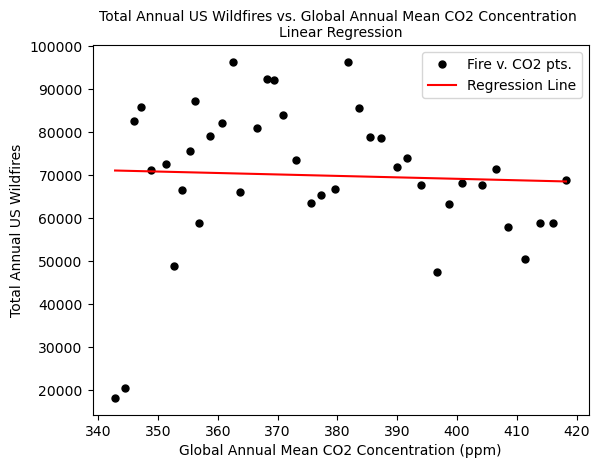

In [20]:
#Plot data points
plt.plot(x1,y1,'o',color='black',markersize=5,label='Fire v. CO2 pts.')

#plot regression line
plt.plot(x1,regress1.intercept+regress1.slope*x1,'r',label='Regression Line')

#plot legend
plt.legend()

#titles and axis labels
plt.title('Total Annual US Wildfires vs. Global Annual Mean CO2 Concentration \nLinear Regression',fontsize=10)
plt.xlabel('Global Annual Mean CO2 Concentration (ppm)')
plt.ylabel('Total Annual US Wildfires');

**Yikes! That's one ugly plot. This confirms to a doubtless extent that there is no inherent correlation between the quantity of wildfires the US experiences every year and the increasing annual CO2 concentration.**

**Let's now take a look at *burn acreage* vs. CO2 concentration.**

In [21]:
#set up lin regress variables for burn acreage and co2 concentration
x2=co2_ann_mean.Mean.values
y2=df_fire['Acres'].values

#perform regression
regress2=stats.linregress(x2,y2)
regress2

LinregressResult(slope=86098.61820724772, intercept=-27108380.354865745, rvalue=0.6751859357080914, pvalue=1.7614766278010397e-06, stderr=15259.135091631122, intercept_stderr=5759177.499928061)

In [22]:
#grab r-squared value (correlation coefficient)
print('R-squared = ', regress2.rvalue**2)

R-squared =  0.4558760477780109


**Hmm. Now that's a little interesting. We noticed a visible uptrend in burn acreage that coincides with the uptrend of mean CO2 concentration in our timeseries plots, but this R-squared value isn't nearly as close to 1 as one might expect. Why is that?**

**Well, as fate may have it, the global system is a massively complex and chaotic entity. It'd be quite difficult to find relationships between two phenomena occurring within such a system that were purely correlated to one another and not sharing correlations or causalities with other phenomena *also* occurring in that system.**

**Worth note is that, while this R-squared value is not close to 1, that does not immediately mean that the relationship is statistically insignificant. In fact, if we look at the "regress2" pvalue output, we see that it is incredibly small, and the smaller the p-value is in a statistical analysis, the greater the significance of an apparent relationship. This essentially means that increasing annual mean CO2 concentration is not necessarily a *direct* cause for the increasing annual burn acreage in the US, but there could be something else occurring in the system as a *result* of increasing CO2 concentration that is correlatable to enhanced burn acreage.**

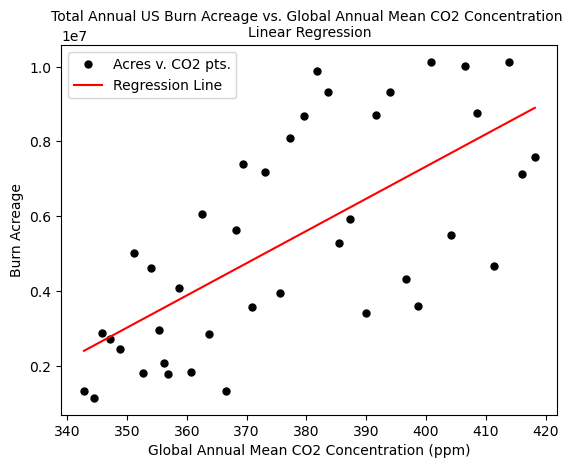

In [23]:
#Plot data points
plt.plot(x2,y2,'o',color='black',markersize=5,label='Acres v. CO2 pts.')

#plot regression line
plt.plot(x2,regress2.intercept+regress2.slope*x2,'r',label='Regression Line')

#plot legend
plt.legend()

#titles and axis labels
plt.title('Total Annual US Burn Acreage vs. Global Annual Mean CO2 Concentration \nLinear Regression',fontsize=10)
plt.xlabel('Global Annual Mean CO2 Concentration (ppm)')
plt.ylabel('Burn Acreage');

**Here, we see that the trendline has a much more pronounced slope, and the data points, while a bit distant from the line, generally trend up along that line. This isn't an especially strong correlation, but it is a correlation nonetheless.**

**Now let's look at annual mean precipitation vs. CO2 concentration.**

In [24]:
#set up lin regress variables for precip and co2 concentration
x3=co2_ann_mean.Mean.values
y3=US_precip_ann.values[4:44]

#perform regression
regress3=stats.linregress(x3,y3)
regress3

LinregressResult(slope=-0.0028803751268575354, intercept=3.0667016268640044, rvalue=-0.4991447991909346, pvalue=0.001042934326653193, stderr=0.0008111638510817042, intercept_stderr=0.306153433458159)

In [25]:
#grab r-squared value (correlation coefficient)
print('R-squared = ', regress3.rvalue**2)

R-squared =  0.2491455305593584


**Oops! That doesn't look terribly inspiring either. Still, let's have a look at the linear regression plot anyway, especially since that pvalue is still quite small, indicating some semblance of statistical significance in the relationship between CO2 concentration and precipitation.**

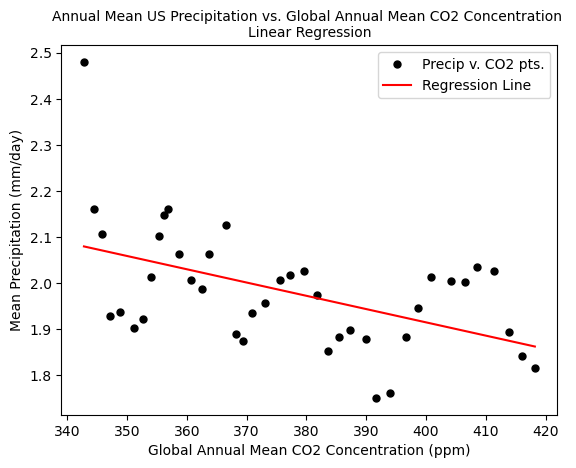

In [26]:
#Plot data points
plt.plot(x3,y3,'o',color='black',markersize=5,label='Precip v. CO2 pts.')

#plot regression line
plt.plot(x3,regress3.intercept+regress3.slope*x3,'r',label='Regression Line')

#plot legend
plt.legend()

#titles and axis labels
plt.title('Annual Mean US Precipitation vs. Global Annual Mean CO2 Concentration \nLinear Regression',fontsize=10)
plt.xlabel('Global Annual Mean CO2 Concentration (ppm)')
plt.ylabel('Mean Precipitation (mm/day)');

**Okay! That's not too bad. We do see a downward trend of precipitation with increasing CO2 concentration, and our data points *are* largely localized around our trendline. This, again, simply implies that increasing annual mean CO2 concentration isn't a *precise* fit for the downward trend in annual mean precipitation in the US, but it could have an indirect impact.**

**Lastly, let's look at total burn acreage vs. annual mean precipitation**

In [27]:
#set up lin regress variables for precip and co2 concentration
x4=US_precip_ann.values[4:44]
y4=df_fire['Acres'].values

#perform regression
regress4=stats.linregress(x4,y4)
regress4

LinregressResult(slope=-11346444.758845598, intercept=27813150.13428571, rvalue=-0.513463421439979, pvalue=0.0007029198104094334, stderr=3076112.4489163114, intercept_stderr=6108168.955304288)

In [28]:
#grab r-squared value (correlation coefficient)
print('R-squared = ', regress4.rvalue**2)

R-squared =  0.2636446851568495


**Hmm. Still not quite the R-squared value we were hoping for. But, once more, we see the p-value for this regression is fairly small, so there *is* a statistically-significant relationship between annual mean precipitation in the US and burn acreage.**

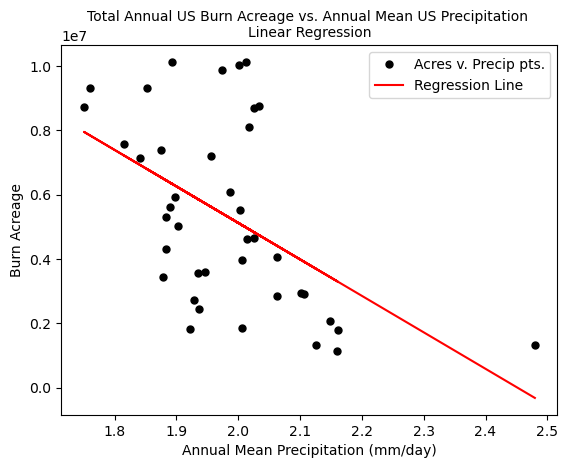

In [29]:
#Plot data points
plt.plot(x4,y4,'o',color='black',markersize=5,label='Acres v. Precip pts.')

#plot regression line
plt.plot(x4,regress4.intercept+regress4.slope*x4,'r',label='Regression Line')

#plot legend
plt.legend()

#titles and axis labels
plt.title('Total Annual US Burn Acreage vs. Annual Mean US Precipitation \nLinear Regression',fontsize=10)
plt.xlabel('Annual Mean Precipitation (mm/day)')
plt.ylabel('Burn Acreage');

**That's... Actually quite odd. The majority of the data points seem to be largely clustered together, but there appears to be a 'straggling outlier' pulling the trendline in its favor. If we were clever, we might've noticed the simultaneous "drop" in mean precipitation and sharp increase in number of wildfires in the exact same year when we were looking at our timeseries plots, around 1985, which means we had some anomalously large amounts of precipitation around 1983 and 1984. Out of curiosity, let's see if we can perform this regression again without the outlier.**

In [30]:
#set up lin regress variables for precip and co2 concentration
fire=df_fire.iloc[1:,:]

x5=US_precip_ann.values[5:44]
y5=fire['Acres'].values

#perform regression
regress5=stats.linregress(x5,y5)
regress5

LinregressResult(slope=-13394618.397292657, intercept=31803184.592255764, rvalue=-0.48882072770491825, pvalue=0.001590784029889898, stderr=3929956.0277444553, intercept_stderr=7747446.453288327)

In [31]:
#grab r-squared value (correlation coefficient)
print('R-squared = ', regress5.rvalue**2)

R-squared =  0.23894570383396582


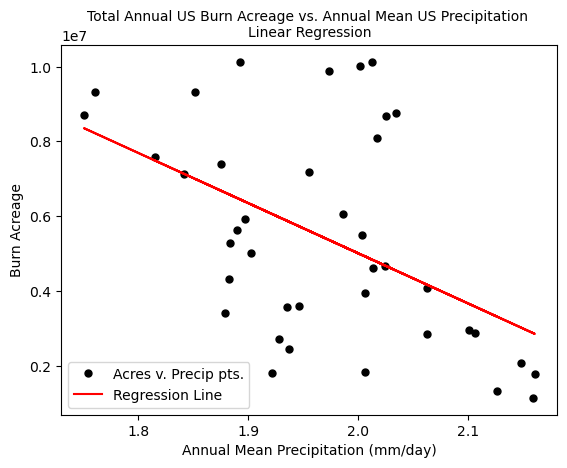

In [32]:
#Plot data points
plt.plot(x5,y5,'o',color='black',markersize=5,label='Acres v. Precip pts.')

#plot regression line
plt.plot(x5,regress5.intercept+regress5.slope*x5,'r',label='Regression Line')

#plot legend
plt.legend()

#titles and axis labels
plt.title('Total Annual US Burn Acreage vs. Annual Mean US Precipitation \nLinear Regression',fontsize=10)
plt.xlabel('Annual Mean Precipitation (mm/day)')
plt.ylabel('Burn Acreage');

**That looks better. It's still not a perfect relationship, by any means, but there is definitely a visible uptrend of burn acreage with decreasing precipitation.**

#### Conclusions

The key takeaway from these rudimentary analyses is that, while we couldn't find a near-1-to-1 link between global annual mean CO2 concentration and wildfire prevalence/severity, there is sufficient enough evidence with regards to relevant correlations to justify exploring deeper into the subject and expanding on analysis methods to improve the significance of findings. For instance, one particularly important consideration in traditional statistical analysis is the sample size of the data being evaluated. Here, we're only looking at ~40 data points, which is enough to provide basic climatologies, but it is not nearly enough to generate legitimate results with a true, scientific basis. A general rule of thumb is to procure a sample size of at least 100; in the case of this project, that would mean procuring data that characterized the last 100 years of US wildfire, precipitation, and CO2 records. However, 100 years of data for three entirely separate datasets eats up computing power very quickly, especially the globally-gridded precipitation data. As well, it can prove quite difficult to find continuous and reliable data for all three parameters for a timeframe that large (the continuous in-situ atmospheric CO2 concentration measurements made at Mauna Loa Observatory only date back to 1958, for example). Something also worth considering is the fact that the global climate system does not react to perturbations instantaneously. If the global mean CO2 concentration increases from one year to the next, then the sequence of events caused as a result of that pertubation would occur gradually (i.e. the cause-and-effect of anthropogenic climate change is not temporally aligned). Thus, if mean CO2 increases, then it could take until the next year, or the year after that, or the year after that for the reaction that increase caused to appear in the data. 

All-in-all, this project sought to at least establish an *apparent* relationship between global annual mean CO2 concentration and total annual US wildfire prevalence/severity, as well as between global annual mean CO2 concentration and annual mean US precipitation, which it generally succeeded in on a surface-level basis. While there is no discernible relationship between quantity of fires and mean CO2 concentration, the strongest correlation we ascertained in this analysis was the relationship between wildfire severity/extent (characterized in burn acreage) and mean CO2 concentration between the years of 1983 and 2022. Furthermore, there is fair significance to the relationship between annual mean precipitation in the US and mean CO2 concentration, which implies at first-glance that drought conditions associated with anthropogenic emissions are, at least in part, a factor driving US wildfire severity.